In [23]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurements', 'stations']

In [6]:
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [8]:
session = Session(engine)
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

### Precipitation Analysis

In [145]:
precipitation_df = pd.read_sql('SELECT date, prcp FROM measurements WHERE date > "2016-08-23"', conn)
precipitation_df = precipitation_df.set_index('date')
precipitation_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


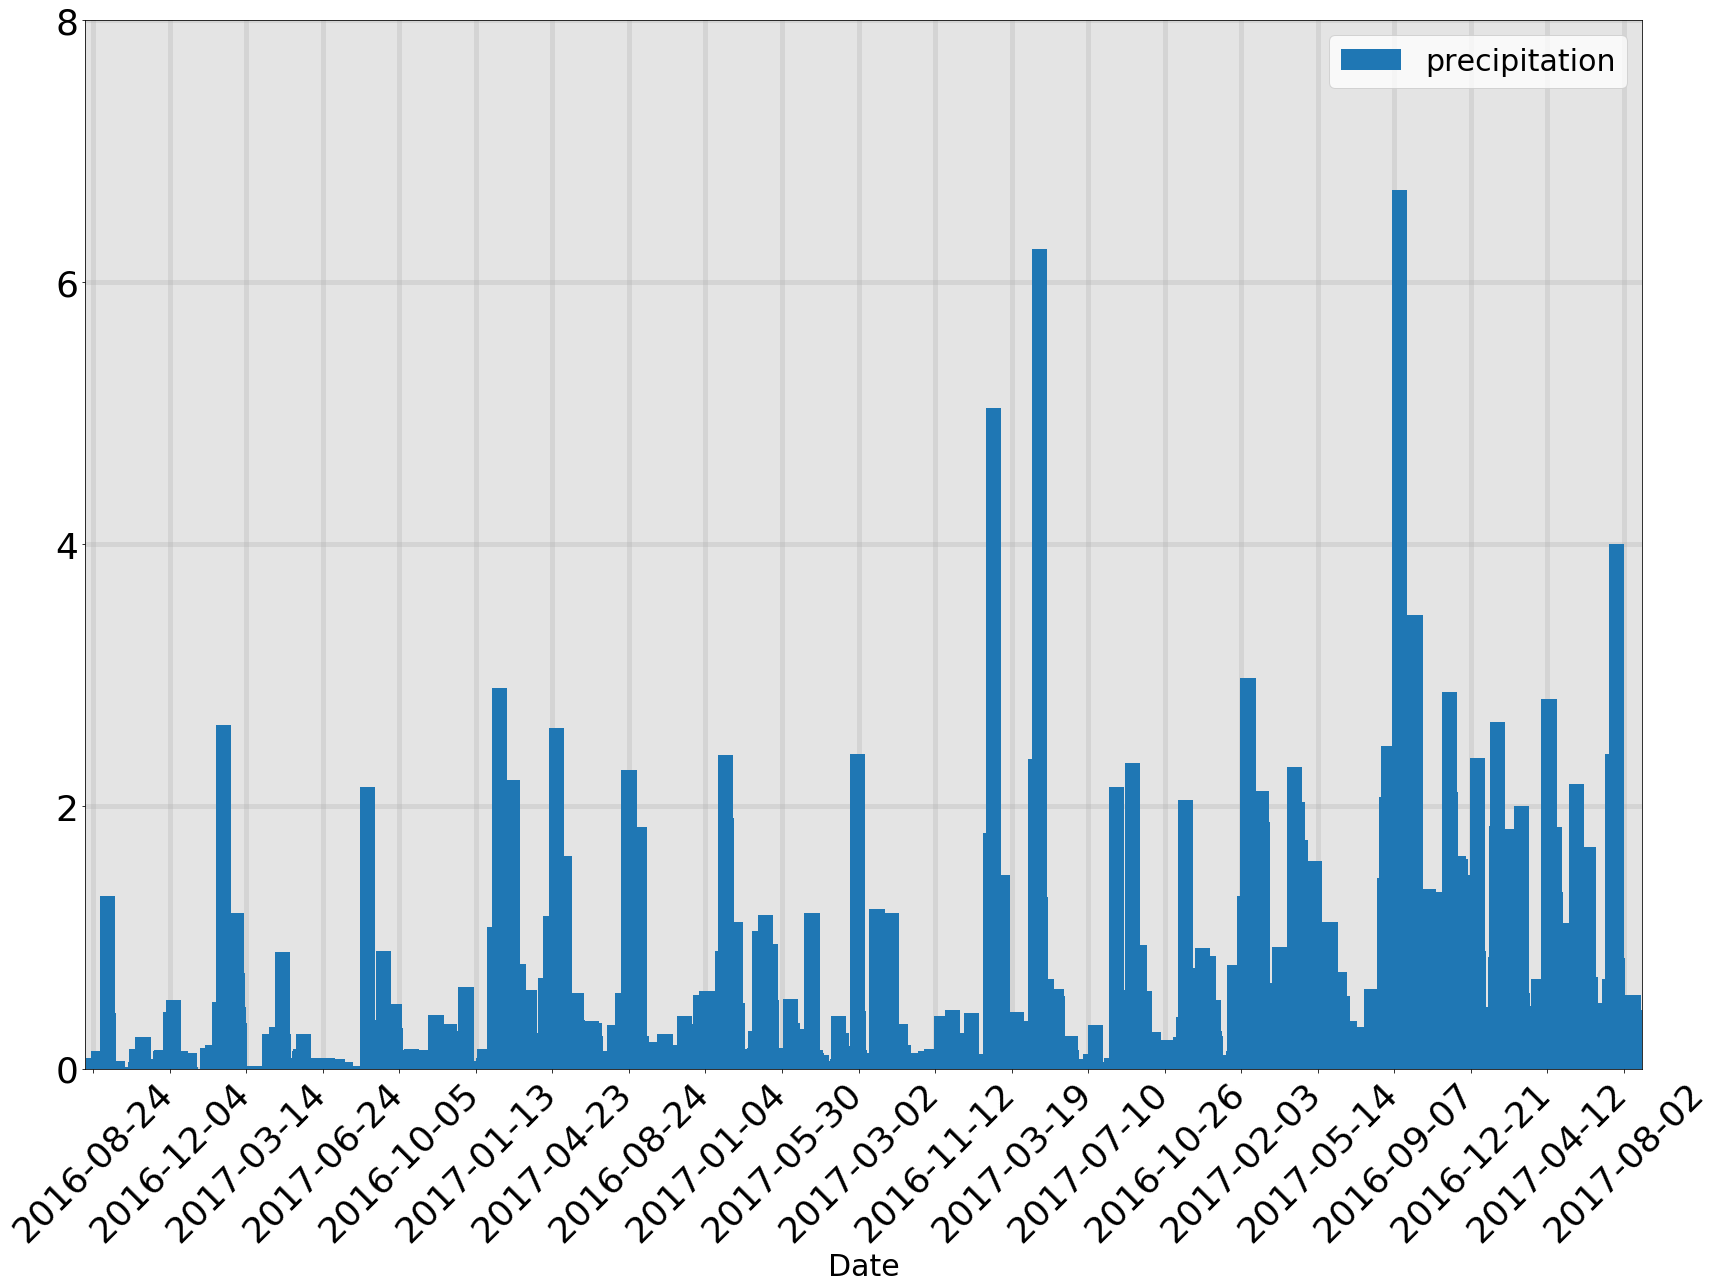

In [197]:
ax = precipitation_df.plot(kind='bar', rot=45, width=20.0, figsize=(24,18), fontsize=36)
x_ticks = ax.xaxis.get_ticklocs()
x_ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(x_ticks[::100])
ax.xaxis.set_ticklabels(x_ticklabels[::100])
y_ticks = ax.yaxis.get_ticklocs()
ax.yaxis.set_ticks(y_ticks[::2])
ax.legend(['precipitation'], fontsize=30)
ax.set_xlabel('Date', fontsize=30)
ax.patch.set_facecolor('lightgray')
ax.patch.set_alpha(0.6)
plt.grid(linewidth=5, alpha=0.3)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('Images/precipitation_analysis')

In [74]:
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [78]:
station_analysis_df = pd.read_sql('SELECT COUNT(DISTINCT(station)) AS stations_count FROM measurements', conn)
station_analysis_df

,stations_count
0,9


In [79]:
station_counts_df = pd.read_sql('SELECT station, COUNT(*) AS station_count FROM measurements GROUP BY station ORDER BY station_count DESC', conn)
station_counts_df

,station,station_count
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


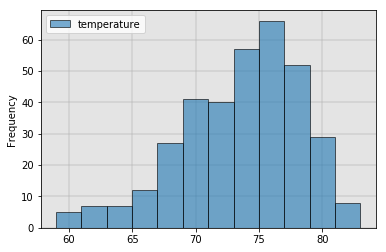

In [193]:
station_counts_df = pd.read_sql('SELECT tobs FROM measurements WHERE station = "USC00519281" AND date > "2016-08-23"', conn)
ax = station_counts_df.plot(kind='hist', bins=12, edgecolor='black', alpha=0.6)
ax.patch.set_facecolor('lightgray')
ax.patch.set_alpha(0.6)
plt.grid(linewidth=2, alpha=0.3)
ax.set_axisbelow(True)
plt.savefig('Images/temperature_analysis.png')
plt.legend(['temperature'])

### Temperature Analysis

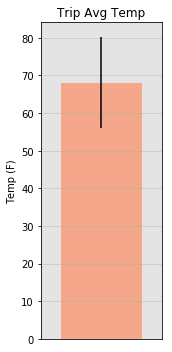

In [329]:
def calc_temps(start_date, end_date):
    min_temp_df = pd.read_sql(f'SELECT MIN(tobs) FROM measurements WHERE date BETWEEN "{start_date}" AND "{end_date}"', conn)
    min_temp = min_temp_df.values[0][0]
    max_temp_df = pd.read_sql(f'SELECT MAX(tobs) FROM measurements WHERE date BETWEEN "{start_date}" AND "{end_date}"', conn)
    max_temp = max_temp_df.values[0][0]
    avg_temp_df = pd.read_sql(f'SELECT AVG(tobs) FROM measurements WHERE date BETWEEN "{start_date}" AND "{end_date}"', conn)
    avg_temp = avg_temp_df.values[0][0]
    
calc_temps("2017-01-07", "2017-01-14")
ax = avg_temp_df.plot(kind='bar', yerr=(max_temp - min_temp), figsize=(2.5, 5), color='coral', width=1.0, alpha=0.6, title='Trip Avg Temp', legend=False)
plt.xticks([])
ax.patch.set_facecolor('lightgray')
ax.patch.set_alpha(0.6)
plt.grid(alpha=0.5)
ax.set_ylabel("Temp (F)")
plt.tight_layout()
plt.savefig("Images/average_temps.png")